<a href="https://colab.research.google.com/github/hoon-i/ML-with-Math/blob/main/Poly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:

# 데이터 로드
data = pd.read_csv(r"C:\Users\jhjang\Desktop\concrete_data.csv")

data


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [ ]:
#input, target설정

x = data.drop(columns=['concrete_compressive_strength'])

y = data['concrete_compressive_strength']


In [ ]:
# 5-Fold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:

# 다항식 차수(1차부터 5차까지) 설정
degree = [1, 2, 3, 4, 5]
result = {}


In [ ]:
# 각 차수별로 회귀 분석 실행 및 MSE 계산

for i in degree:
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(x)  # X 데이터를 다항식으로 변환

    #모델링
    model = LinearRegression()
    mse = -cross_val_score(model, X_poly, y, cv=kf, scoring='neg_mean_squared_error')
    mean = np.mean(mse)
    result[i] = mean

    print(f'차수 : {i}, MSE : {mean}')


차수 : 1, MSE : 110.99497812354932
차수 : 2, MSE : 59.12038508605038
차수 : 3, MSE : 45.48205115378292
차수 : 4, MSE : 8698.586024283659
차수 : 5, MSE : 174852446063.2286


In [ ]:
# 최적 차수 선택
optimal_degree = min(result, key=result.get)
print(f'최적의 다항식 차수: {optimal_degree}')

최적의 다항식 차수: 3


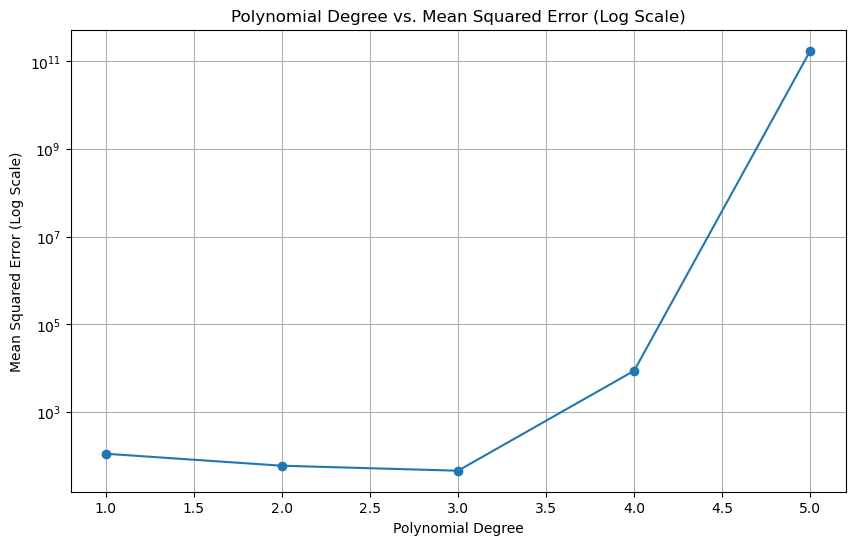

In [ ]:

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(degree, [result[i] for i in degree], marker='o')
plt.xscale('linear')
plt.yscale('log')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error (Log Scale)')
plt.title('Polynomial Degree vs. Mean Squared Error (Log Scale)')
plt.grid(True)
plt.show()
